In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Algerian forest fire cleaned dataset.csv")
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,0,1,6,2012,29,57,57,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,1,2,6,2012,29,61,61,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,2,3,6,2012,26,82,82,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,3,4,6,2012,25,89,89,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,4,5,6,2012,27,77,77,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [3]:
dfc = df.drop(["index","day","month","year"],axis = 1)

In [4]:
dfc.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,57,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,61,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82,82,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,89,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77,77,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [5]:
dfc["Classes"] = np.where(dfc["Classes"].str.contains("not fire"),0,1)

In [6]:
dfc["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [7]:
dfc.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,57,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,61,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,82,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,89,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,77,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [8]:
#independent and depended data
x = dfc.drop("FWI",axis=1)
y = dfc["FWI"]

In [9]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [10]:
x_train.shape

(182, 11)

In [11]:
x_test.shape

(61, 11)

In [12]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.656095,-0.656095,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,1.000000,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.656095,1.000000,1.000000,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Rain,-0.317512,0.241656,0.241656,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.653023,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,-0.414601,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,-0.236078,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.717804,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,-0.362317,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.456876,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

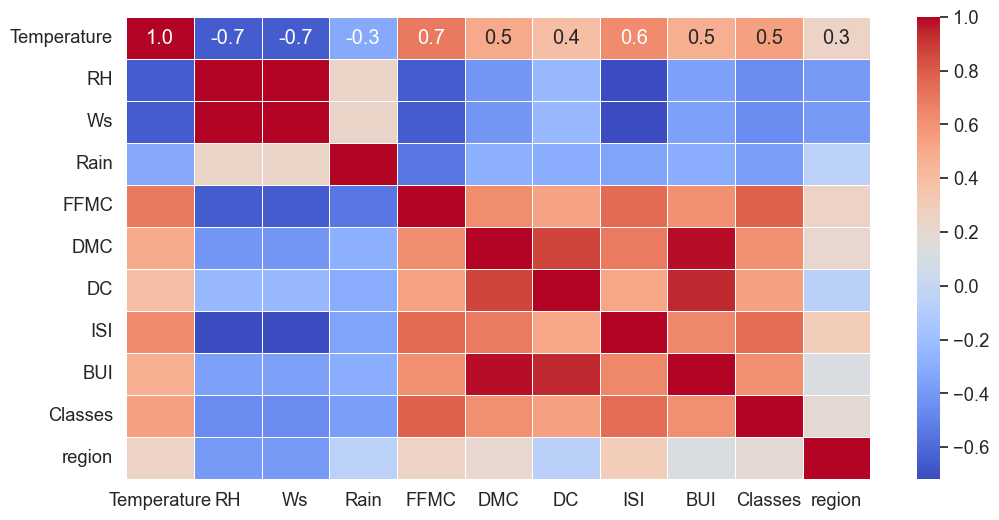

In [13]:
plt.figure(figsize=(12,6))
sns.set(font_scale=1.2)
corr =x_train.corr()
sns.heatmap(corr,annot=True,fmt=".1f", cmap="coolwarm", linewidths=0.52)

In [28]:
def corelation(dataset,threshold):
    col_corr=set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                col_corr.add(corr_matrix.columns[i])
    return col_corr

In [42]:
corelation_features = corelation(x_train,0.85)
corelation_features

{'BUI', 'DC', 'Ws'}

In [46]:
x_train.drop(corelation_features,axis=1,inplace=True)
x_test.drop(corelation_features,axis=1,inplace=True)

In [48]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [56]:
x_train_scaled

array([[-0.84284248,  0.78307967, -0.33727373, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.29048728, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.38406017, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  2.984564  , ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454, -0.38406017, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  0.45809587, ..., -0.86113478,
        -1.10431526, -0.98907071]])

<Axes: >

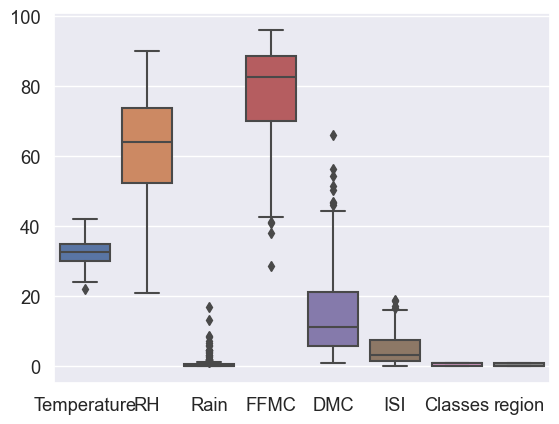

In [58]:
sns.boxplot(data = x_train)

<Axes: >

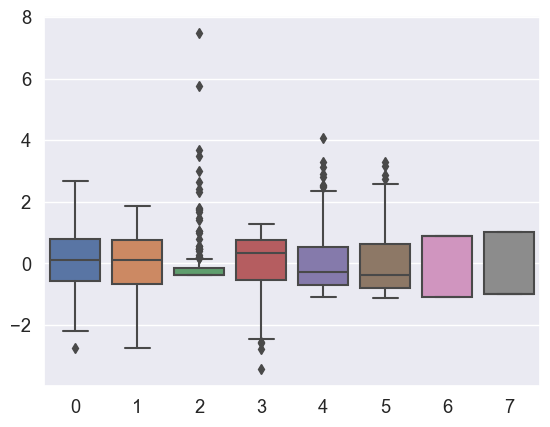

In [60]:
sns.boxplot(data = x_train_scaled)

# Linear model

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred = linreg.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("MAE = ",mae)
print("Score = ",score)

MAE =  0.548200721033302
Score =  0.98471177265427


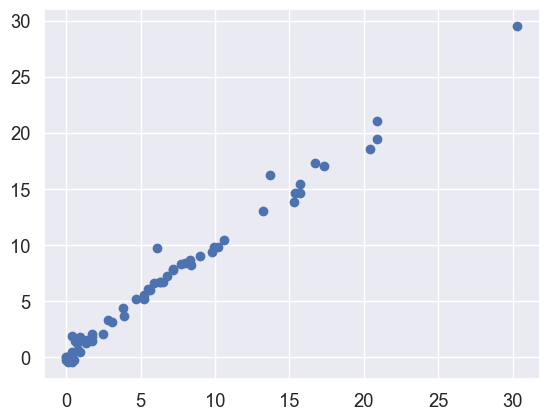

In [74]:
plt.scatter(y_test,y_pred)

# Lasso model

In [78]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lass = Lasso()
lass.fit(x_train_scaled,y_train)
y_pred = lass.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("MAE = ",mae)
print("Score = ",score)

MAE =  1.1331762054391363
Score =  0.949201962611654


# Ridge

In [80]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Rig = Ridge()
Rig.fit(x_train_scaled,y_train)
y_pred = Rig.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("MAE = ",mae)
print("Score = ",score)

MAE =  0.5684447703033755
Score =  0.9841057412656321


# ElasticNet

In [83]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Elastic = ElasticNet()
Elastic.fit(x_train_scaled,y_train)
y_pred = Elastic.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("MAE = ",mae)
print("Score = ",score)

MAE =  1.8822362382093927
Score =  0.8753457914774971
